# Session 4 : Supervised learning (3/3)

## Preliminaries

Run the script `datasets.py` like you did in the last notebook to load the functions used to generate artificial datasets.

In [67]:
%run datasets.py

## Support Vector Machine

### Toy dataset

In [68]:
# Create a dataset of 300 points with make_forge()
# and split it into a 270 points training set and 
# 30 points test set.
X,y = make_forge(300)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)

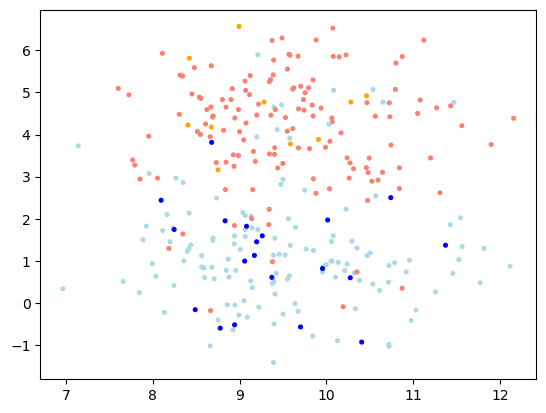

In [69]:
# Print the training points on a 2d figure. Points with
# class 1 should have the color 'salmon' and points with
# the class 0 should have the color 'lightblue'.

# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
points_train = np.where(y_train == 1, "salmon", "lightblue")
plt.scatter(X_train[:,0], X_train[:,1], c=points_train, s=7)

# Print the test points on the same figure with color
# 'orange' for class 1 and 'blue' for class 0.

# YOUR CODE HERE
points_test = np.where(y_test == 1, "orange", "blue")
plt.scatter(X_test[:,0], X_test[:,1], c=points_test, s=7)
plt.show()

the Accuracy of the linear kernel = 0.9333333333333333
47 support vectors has been found for class 0
47 support vectors has been found for class 1


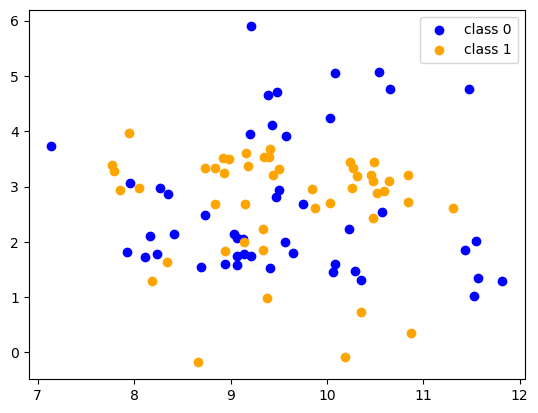

In [70]:
# Create a SVM model for classification with SVC class.
# Use a linear kernel. Train it and evaluate its accuracy
from sklearn.svm import SVC
SVM_model = SVC(kernel="linear")
SVM_model.fit(X_train, y_train)
accuracy = SVM_model.score(X_test, y_test)
print("the Accuracy of the linear kernel =", accuracy)


# How many support vectors have been found for each class ?
print(SVM_model.n_support_[0], "support vectors has been found for class 0")
print(SVM_model.n_support_[1], "support vectors has been found for class 1")
# Print them.
plt.scatter(SVM_model.support_vectors_[:SVM_model.n_support_[1], 0],SVM_model.support_vectors_[:SVM_model.n_support_[1], 1],c="blue", label="class 0")
plt.scatter(SVM_model.support_vectors_[SVM_model.n_support_[1]:, 0],SVM_model.support_vectors_[SVM_model.n_support_[1]:, 1],c="orange", label="class 1")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

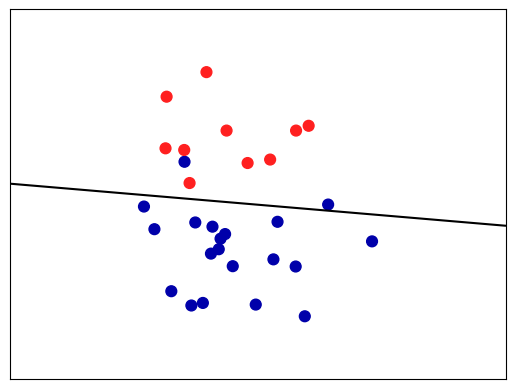

Answers :
We have  2  misclassified points out of  30  test points
the dataset is not linearly separable
Justification : we cannot separate blue points from the red ones with a line
It would be possible to improve the accuracy of the model
Justification : if we rotate the line a litte bit in anticlock direction
that will improve the accuracy of the model because it will lead to only one blue misclassified point


In [71]:
%run plots.py
figure = plt.figure()

# Visualize the decision boundary of your SVM. How many 
# points are misclassified ? Is your dataset linearly 
# separable ? Do you think it would be possible to improve 
# the accuracy of the model ? Explain why.

# YOUR CODE HERE
plot_2d_separator(SVM_model, X_test, y_test)
plt.show()
print("Answers :")
print("We have ",sum(SVM_model.predict(X_test) != y_test)," misclassified points out of ",len(X_test)," test points")
print("the dataset is not linearly separable")
print("Justification : we cannot separate blue points from the red ones with a line")
print("It would be possible to improve the accuracy of the model")
print("Justification : if we rotate the line a litte bit in anticlock direction")
print("that will improve the accuracy of the model because it will lead to only one blue misclassified point")

The model number : 1 | penalty value = 10
Train accuracy = 0.8888888888888888
Test accuracy = 0.9333333333333333


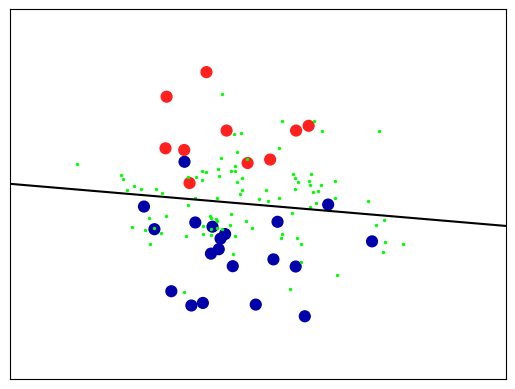

The model number : 2 | penalty value = 1
Train accuracy = 0.8888888888888888
Test accuracy = 0.9333333333333333


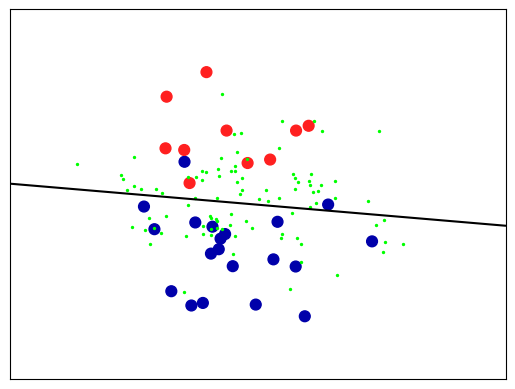

The model number : 3 | penalty value = 0.1
Train accuracy = 0.8888888888888888
Test accuracy = 0.9333333333333333


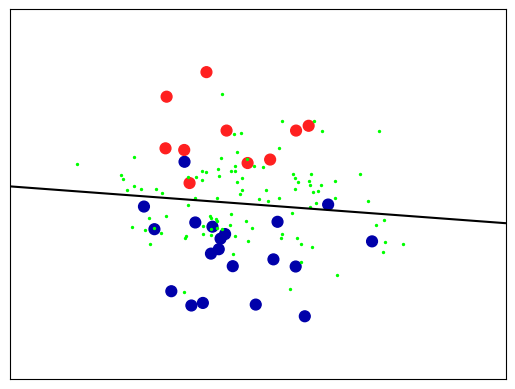

The model number : 4 | penalty value = 0.01
Train accuracy = 0.8814814814814815
Test accuracy = 0.9666666666666667


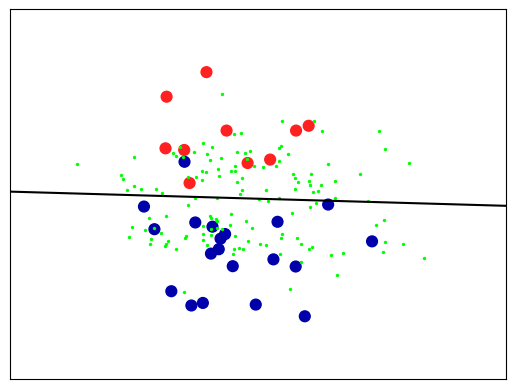

The model number : 5 | penalty value = 0.001
Train accuracy = 0.8851851851851852
Test accuracy = 0.9666666666666667


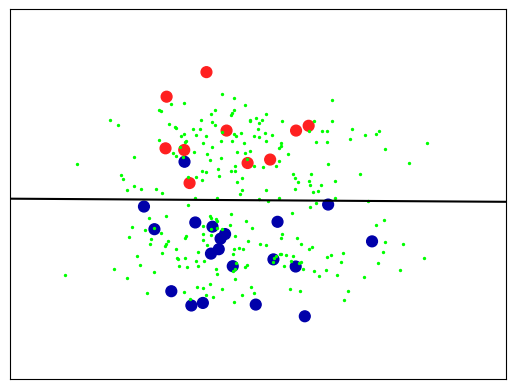

In [72]:
# Train 5 other SVM with a modified value for the penalty
# and plot the decision boundary for each one.
# Explain the effect of this parameter (what happens if we 
# increase/decrease it ?)
# Do you think it can help to prevent underfitting or 
# overfitting ?
penalty_values = [10,1, 0.1 , 0.01 ,0.001]
for penalty in enumerate(penalty_values):
    model = SVC(kernel="linear", C=penalty[1])
    model.fit(X_train, y_train)
    print(f"The model number : {penalty[0]+1} | penalty value = {penalty[1]}")
    print("Train accuracy =", model.score(X_train, y_train))
    print("Test accuracy =", model.score(X_test, y_test))
    plot_2d_separator(model, X_test, y_test)
    plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], c="lime", s=2)
    plt.show()

***Answer*** </br>
**Effect of Increasing the parametre C:**</br>
-Smaller margin, more focus on correctly classifying each point.</br>
-Fewer support vectors, a more complex decision boundary.</br>
**Effect of Decreasing the parametre C:**</br>
-Larger margin, willingness to tolerate misclassifications.</br>
-More support vectors, a smoother decision boundary.</br>
**Preventing Underfitting or Overfitting:**</br>
-High C may lead to overfitting, fitting training data too closely.</br>
-Low C may result in underfitting, focusing too much on a large margin.

### Real case dataset

In [74]:
# Load the breast cancer dataset and train a linear SVC
# model on this dataset. You can create several models and
# adjust the value of the penalty parameter to find the
# optimal one. Can you get a better accuracy than the KNN
# model (it was 0.923?)
from sklearn.datasets import load_breast_cancer
breast_dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_dataset.data, breast_dataset.target, random_state=0)
SVC_model = SVC(kernel="linear", C=10, random_state=0)
SVC_model.fit(X_train, y_train)
print("we got a better accuracy than the KNN model")
print("Train accuracy:", SVC_model.score(X_train, y_train))
print("Test  accuracy:",SVC_model.score(X_test, y_test))

we got a better accuracy than the KNN model
Train accuracy: 0.9765258215962441
Test  accuracy: 0.965034965034965


# Neural Networks

## Activation functions

The activation function $f$ of a neuron can be linear or non linear. The most used activation functions are :
* sigmoid
* tanh
* ReLu (rectified linear)

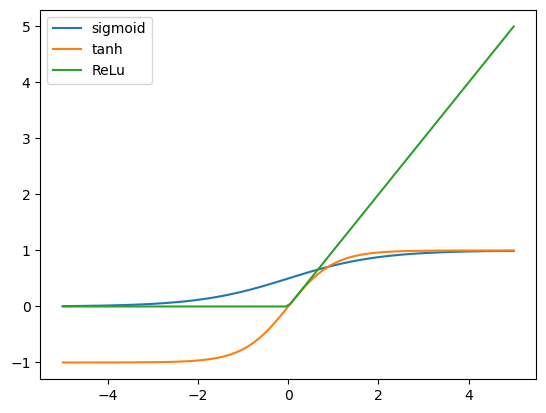

In [75]:
# using the example for sigmoid, plot the representation of
# tanh and ReLu on the same graph. ReLu is defined as:
# ReLu(x) = max(0, x)

import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ReLu(x):
    return np.maximum(0,x)

x = np.linspace(-5, 5, 100)
sigmoid_x = sigmoid(x)
tanh_x = np.tanh(x)
ReLu_x = ReLu(x)

figure = plt.figure()
plt.plot(x, sigmoid_x, label="sigmoid")
plt.plot(x, tanh_x, label="tanh")
plt.plot(x, ReLu_x, label="ReLu")
plt.legend()
plt.show()

### Tuning a neural network

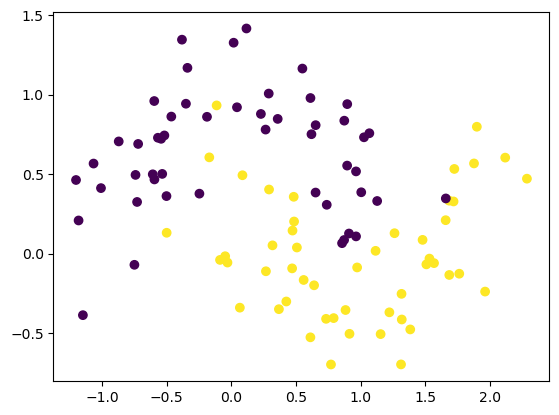

In [76]:
# We use a non linearly separable dataset that looks
# like two moons.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

As you can see, using a linear SVM does not seem to be the best choice. Let's use neural networks to be able to classify this dataset. First, split the data into a training and a test set.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Train accuracy: 0.9866666666666667
Test  accuracy: 0.88


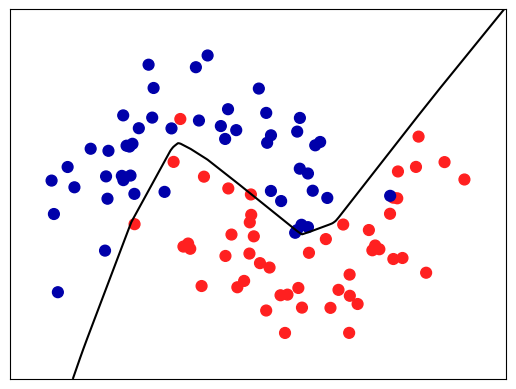

The neural network is not good since the test accuracy is low and the network needs a hight number of iteration to converge


In [83]:
# Create a neural network with all default parameters.
# Compute its accuracy and print its decision boundary
# Do you think the neural network is good ? Explain why.
from sklearn.neural_network import MLPClassifier

# YOUR CODE HERE
neural_network = MLPClassifier(max_iter=10000)
neural_network.fit(X_train, y_train)
print("Train accuracy:", neural_network.score(X_train, y_train))
print("Test  accuracy:", neural_network.score(X_test, y_test))
plot_2d_separator(neural_network, X, y)
plt.show()
print("The neural network is not good since the test accuracy is low and the network needs a hight number of iteration to converge")

In [93]:
# There exist different algorithms to train a neural
# network. The default one is called 'adam'. Use the
# documentation to know what are the other kind of
# algorithm. Create other networks with each type of
# algorithm. Which one is the best ?
neural_network_adam = MLPClassifier(solver="adam")
neural_network_adam.fit(X_train, y_train)
print("-------------------{Adam}------------------------")
print("Train accuracy:", neural_network_adam.score(X_train, y_train))
print("Test  accuracy:", neural_network_adam.score(X_test, y_test))
neural_network_sgd = MLPClassifier(solver="sgd")
neural_network_sgd.fit(X_train, y_train)
print("-------------------{SGD}------------------------")
print("Train accuracy:", neural_network_sgd.score(X_train, y_train))
print("Test  accuracy:", neural_network_sgd.score(X_test, y_test))
neural_network_lbfgs = MLPClassifier(solver="lbfgs")
neural_network_lbfgs.fit(X_train, y_train)
print("-------------------{LBFGS}------------------------")
print("Train accuracy:", neural_network_lbfgs.score(X_train, y_train))
print("Test  accuracy:", neural_network_lbfgs.score(X_test, y_test))
print("-------------------------------------------------")


-------------------{Adam}------------------------
Train accuracy: 0.8666666666666667
Test  accuracy: 0.84
-------------------{SGD}------------------------
Train accuracy: 0.7333333333333333
Test  accuracy: 0.76
-------------------{LBFGS}------------------------
Train accuracy: 1.0
Test  accuracy: 0.84
-------------------------------------------------


C:\Users\Aymen\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Aymen\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Answer** : the 2 best network are Adam and LBFGS with a test accuracy = 0.84 > 0.76 = test accuracy of SGD

In [ ]:
# By default, the neural network has only 1 hidden layer of
# 100 neurons. Use the right parameter to create a network
# of 2 hidden layers, each one having 10 neurons.

# Create other networks with different parameters to see if
# many small layers is better than 1 big layer.

In [ ]:
# You can also modify the activation function of the
# neurons in your network. Create a network for each type
# of activation. Which one is the best ?